In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy.external as sce

In [2]:
adata = sc.read("../../output/adata_anno_2.h5ad")

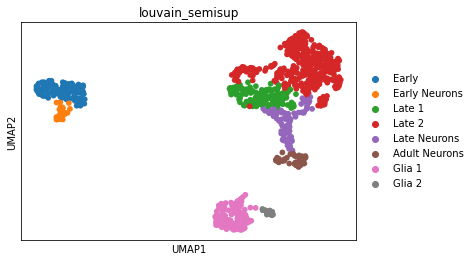

In [3]:
sc.pl.umap(adata, color = "louvain_semisup")

In [4]:
autonomic = sc.read("../../data/autonomic_counts.csv")

In [5]:
#add raw count information to adata

autonomic.layers["counts"] = autonomic.X.copy()

In [6]:
#normalize and take log counts

sc.pp.normalize_per_cell(autonomic, counts_per_cell_after=1e6)
sc.pp.log1p(autonomic)

In [7]:
autonomic

AnnData object with n_obs × n_vars = 94 × 23420 
    obs: 'n_counts'
    layers: 'counts'

In [8]:
len(adata.varm["PCs"])

23299

In [9]:
combined = adata.concatenate(autonomic, batch_key = "type")

layers are inconsistent - only layers that are shared among all AnnData objects are included.


In [10]:
combined.var_names

Index(['Xkr4', 'Sox17', 'Mrpl15', 'Rgs20', 'Sntg1', '2610203C22Rik', 'Mybl1',
       'Vcpip1', 'Snhg6', 'Cops5',
       ...
       'Gemin8', 'Gpm6b', 'Trappc2', 'Gm1720', 'Arhgap6', 'Mid1', 'Uty',
       'Ddx3y', 'Kdm5d', 'Eif2s3y'],
      dtype='object', length=14954)

In [11]:
adata

AnnData object with n_obs × n_vars = 904 × 23299 
    obs: 'batch', 'time_point', 'cell_num', 'batch_E12', 'batch_E16', 'batch_P00', 'batch_P60', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'Cd14', 'Cdh1', 'Meis2', 'S_score', 'G2M_score', 'phase', 'cc_dif', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.8', 'louvain_r1.2', 'louvain_r1.5', '__is_in_cluster__', 'louvain_semisup'
    var: 'accession', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_E12_colors', 'batch_E16_colors', 'batch_P00_colors', 'batch_P60_colors', 'louvain', 'louvain_r0.5_colors', 'louvain_r0.8_colors', 'louvain_r1.2_colors', 'louvain_r1.5_colors', 'louvain_r1_colors', 'louvain_semisup_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes', 'rank_genes_groups_filtered', 'time_point_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'spliced', 'unspliced'

In [12]:
variable_names = adata.var_names[adata.var_names.isin(combined.var_names)]

In [13]:
sum(variable_names == combined.var_names)

14954

In [14]:
factor_loadings = adata.varm["PCs"][adata.var_names.isin(combined.var_names)]

In [15]:
combined.varm["PCs"] = adata.varm["PCs"][adata.var_names.isin(combined.var_names)]

In [16]:
combined.obsm["X_pca"] = combined.X.dot(combined.varm["PCs"])

In [17]:
adata.obsm["X_pca"].shape

(904, 50)

In [76]:
combined.obsm["X_pca"].shape

(998, 50)

In [98]:
combined.obsm["X_pca"].shape

(998, 50)

... storing '__is_in_cluster__' as categorical
... storing 'batch' as categorical
... storing 'batch_E12' as categorical
... storing 'batch_E16' as categorical
... storing 'batch_P00' as categorical
... storing 'batch_P60' as categorical
... storing 'cell_num' as categorical
... storing 'louvain_r0.5' as categorical
... storing 'louvain_r0.8' as categorical
... storing 'louvain_r1' as categorical
... storing 'louvain_r1.2' as categorical
... storing 'louvain_r1.5' as categorical
... storing 'louvain_semisup' as categorical
... storing 'phase' as categorical
... storing 'time_point' as categorical


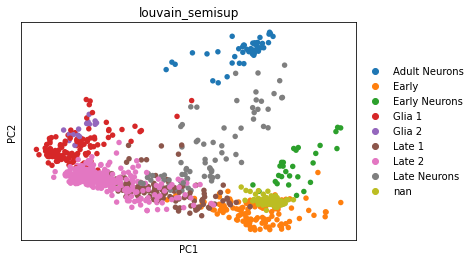

In [18]:
sc.pl.pca(combined, color = "louvain_semisup")

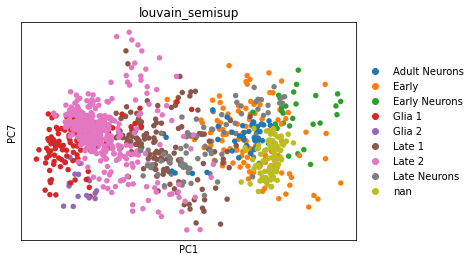

In [28]:
sc.pl.pca(combined, color = "louvain_semisup", components = ['1,7'])

In [30]:
#save adata to file
combined.write("../../output/combined_anno.h5ad")

data_mat = combined.X.T

dat = pd.DataFrame(data_mat)
dat.index = combined.var_names
dat.columns = combined.obs_names

dat.to_csv("../../output/combined_anno.csv")
combined.obs.to_csv("../../output/combined_obs_anno.csv")
combined.var.to_csv("../../output/combined_var_anno.csv")


In [100]:
combined_harmony = combined

In [101]:
sc.tl.pca(combined_harmony)

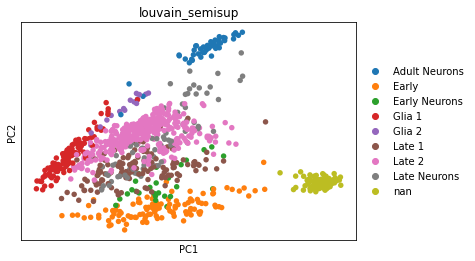

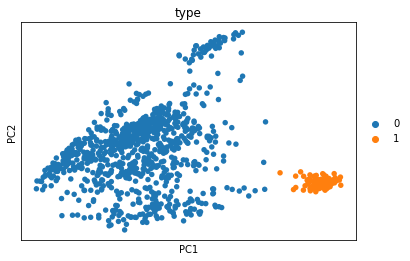

In [103]:
sc.pl.pca(combined_harmony, color = "louvain_semisup")
sc.pl.pca(combined_harmony, color = "type")

In [87]:
adata.obs.batch

index
E12_01.A0001_1       E12_01
E12_01.A0003_1       E12_01
E12_01.A0004_1       E12_01
E12_01.A0005_1       E12_01
E12_01.A0006_1       E12_01
E12_01.A0008_1       E12_01
E12_01.A0009_1       E12_01
E12_01.A0011_1       E12_01
E12_01.A0012_1       E12_01
E12_01.B0001_1       E12_01
E12_01.B0003_1       E12_01
E12_01.B0009_1       E12_01
E12_01.B0010_1       E12_01
E12_01.B0012_1       E12_01
E12_01.C0006_1       E12_01
E12_01.C0007_1D      E12_01
E12_01.C0008_1       E12_01
E12_01.C0009_1       E12_01
E12_01.C0011_1D      E12_01
E12_01.D0001_1       E12_01
E12_01.D0003_1       E12_01
E12_01.D0006_1       E12_01
E12_01.D0007_1Irr    E12_01
E12_01.D0008_1       E12_01
E12_01.D0009_1D      E12_01
E12_01.E0010_1       E12_01
E12_01.E0012_1D      E12_01
E12_01.F0001_1       E12_01
E12_01.F0006_1s      E12_01
E12_01.F0008_1       E12_01
                      ...  
P00_17.A0937_NA      P00_17
P00_17.A0938_NA      P00_17
P00_17.A0939_NA      P00_17
P00_17.A0940_NA      P00_17
P00_17.A0941_N

In [104]:
sce.pp.harmony_integrate(adata, 'type')

AttributeError: module 'scanpy.external.pp' has no attribute 'harmony_integrate'